In [5]:
import pandas as pd
import numpy as np

In [11]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\mugop\data.csv', delimiter=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [13]:
def detect_outliers_iqr_selected(df, columns):
    outliers_info = {}

    for col in columns:
        if col not in df.columns:
            print(f"Column '{col}' not found in DataFrame.")
            continue

        data = df[col].dropna()
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Get row indices and values of outliers
        outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = {
            "count": outlier_rows.shape[0],
            "indices": outlier_rows.index.tolist(),
            "values": outlier_rows[col].values
        }

    return outliers_info

# Example usage:
selected_columns = [
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)'
]

outliers_detected = detect_outliers_iqr_selected(df, selected_columns)

# To display the results
for col, details in outliers_detected.items():
    print(f"\nColumn: {col}")
    print(f"Outlier count: {details['count']}")
    print(f"Row indices: {details['indices']}")
    print(f"Outlier values: {details['values']}")


Column: Previous qualification (grade)
Outlier count: 179
Row indices: [4, 53, 139, 142, 166, 261, 285, 287, 321, 341, 349, 381, 394, 399, 484, 493, 496, 513, 524, 577, 584, 602, 660, 669, 678, 682, 685, 693, 696, 702, 704, 711, 762, 852, 869, 934, 948, 974, 981, 1002, 1008, 1014, 1038, 1046, 1064, 1120, 1122, 1215, 1223, 1254, 1266, 1283, 1294, 1326, 1443, 1468, 1533, 1542, 1548, 1555, 1577, 1591, 1597, 1606, 1623, 1641, 1668, 1698, 1717, 1767, 1816, 1867, 1872, 1888, 2018, 2033, 2035, 2097, 2124, 2128, 2129, 2176, 2205, 2214, 2221, 2262, 2269, 2274, 2328, 2336, 2375, 2400, 2409, 2413, 2427, 2431, 2439, 2441, 2451, 2455, 2457, 2484, 2495, 2511, 2513, 2536, 2555, 2557, 2564, 2620, 2661, 2680, 2715, 2724, 2751, 2762, 2793, 2811, 2848, 2853, 2857, 2901, 2902, 2939, 2940, 2952, 2968, 2987, 2990, 3024, 3076, 3092, 3103, 3109, 3144, 3147, 3149, 3152, 3200, 3214, 3215, 3241, 3262, 3277, 3292, 3314, 3317, 3426, 3471, 3542, 3577, 3606, 3633, 3666, 3671, 3676, 3803, 3813, 3819, 3832, 3861, 394

In [14]:
# Replace outliers with median based on previous outlier detection
for col in outliers_detected:
    median = df[col].median()
    indices = outliers_detected[col]['indices']
    df.loc[indices, col] = median

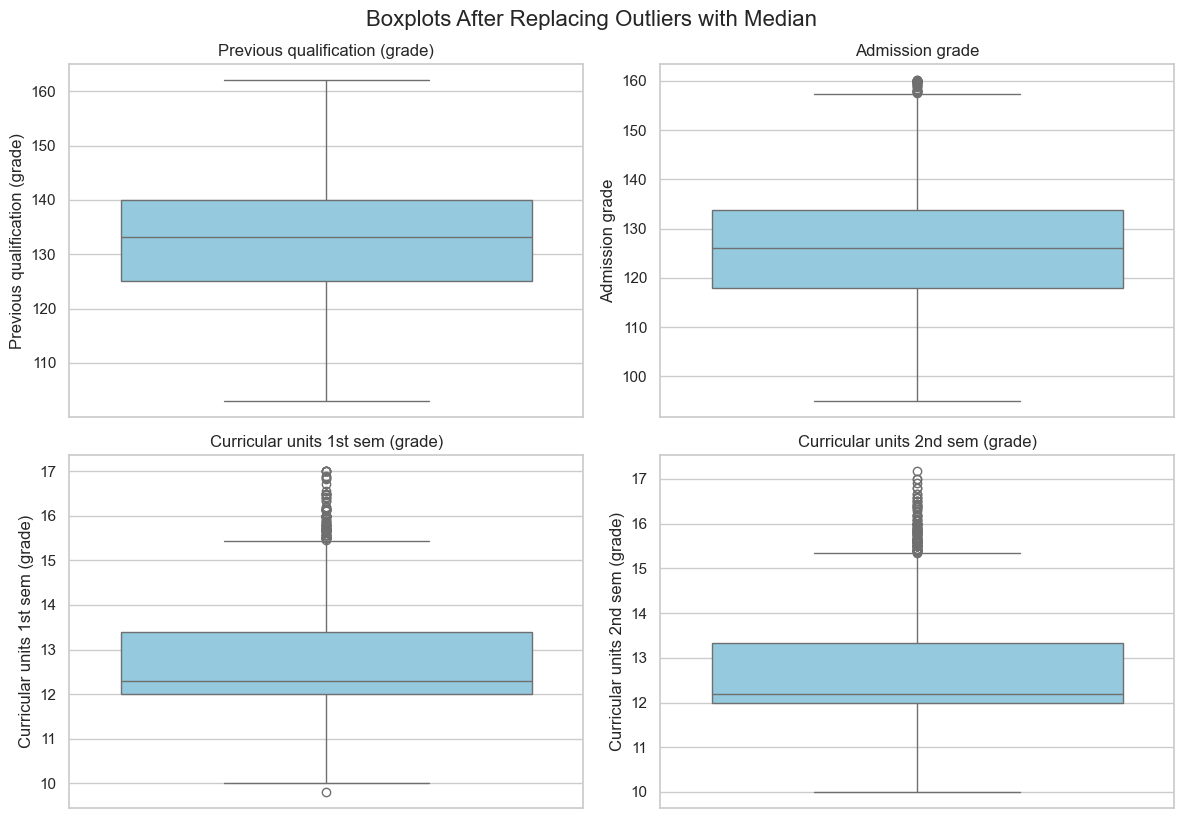

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Select only the 4 columns
columns_to_plot = [
    'Previous qualification (grade)', 
    'Admission grade', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)'
]

# Create a 2x2 grid of boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots After Replacing Outliers with Median", fontsize=16, y=1.02)
plt.show()

In [17]:
# Convert Target variable into numerical data

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder() 

df['Target'] = le.fit_transform(df['Target'])

In [18]:
df['Target']

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [19]:
print(le.classes_)



['Dropout' 'Enrolled' 'Graduate']


In [20]:
# Splitting the Dataset into Training and Test set
X=df.drop(labels=['Target'], axis=1)
y=df['Target']

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Display original class distribution
print("Original target distribution:", Counter(y))

# Initialize SMOTE with strategy to balance all classes equally
sm = SMOTE(random_state=42, sampling_strategy='not majority')  # or use a dict (shown below)

# Fit and resample the dataset
X, y = sm.fit_resample(X, y)

# Display new class distribution
print("Resampled target distribution:", Counter(y))

Original target distribution: Counter({2: 2209, 0: 1421, 1: 794})
Resampled target distribution: Counter({0: 2209, 2: 2209, 1: 2209})


In [23]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Target'], axis=1),
    df['Target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((3096, 36), (1328, 36))

In [24]:
# applying variance threshold
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=1)
var_thres.fit(X_train)

VarianceThreshold(threshold=1)

In [25]:
var_thres.get_support()

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True])

In [26]:
### Finding non constant features
sum(var_thres.get_support())

np.int64(25)

In [27]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

11


In [28]:
# names of the constant features
for column in constant_columns:
    print(column)

Marital status
Daytime/evening attendance	
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
International
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (without evaluations)


In [29]:
print(constant_columns)

['Marital status', 'Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)']


In [30]:
# dropping the constant columns in both X_train and X_test
X_train.drop(constant_columns,axis=1, inplace= True)
X_test.drop(constant_columns,axis=1, inplace = True )

In [31]:
X_train.shape

(3096, 25)

In [32]:
X_test.shape

(1328, 25)

<Axes: >

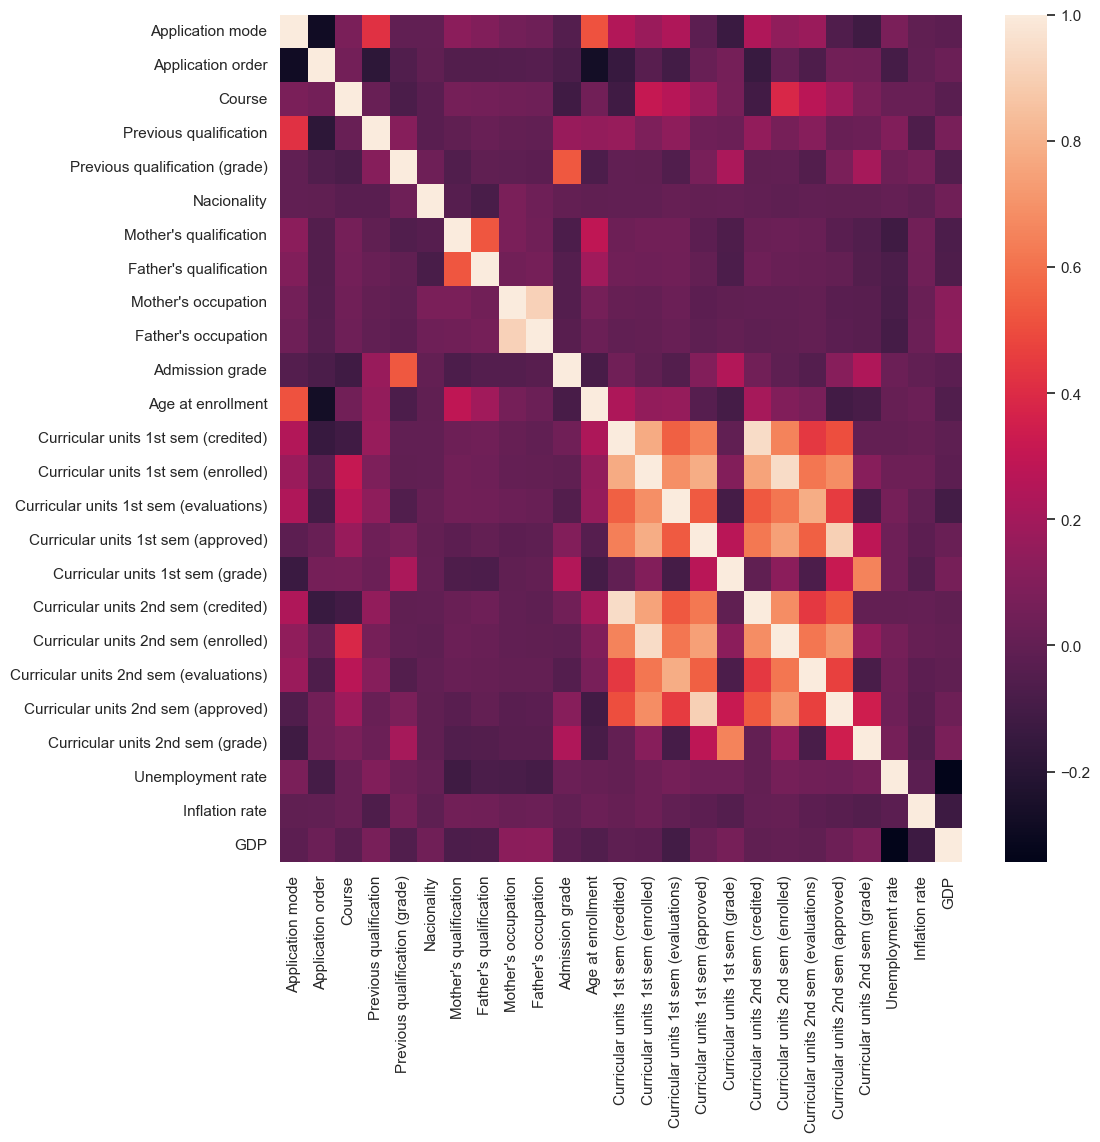

In [33]:
# Feature Selection using - Correlation
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

4

In [36]:
corr_features

{'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 "Father's occupation"}

In [37]:
# dropping highly correlated feature above a 0.9
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)

In [38]:
X_train.shape,X_test.shape

((3096, 21), (1328, 21))

In [39]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

In [47]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [42]:
print(X_train)

[[ 1.16235569 -0.55767627 -0.37963021 ... -1.01421689  0.12208077
   1.53969605]
 [-0.09226566  0.21622141  0.4871222  ... -1.50331588  0.99095909
   0.13778973]
 [-0.09226566 -0.55767627  0.08650255 ...  0.30258807 -0.52957797
   0.78380926]
 ...
 [-1.00471755  0.9901191   0.34714098 ...  0.30258807 -0.52957797
   0.78380926]
 [-1.00471755 -0.55767627  0.44941683 ...  1.46890104  1.13577214
  -1.78708477]
 [-1.00471755 -0.55767627  0.32074722 ...  0.41545707  1.78743088
  -0.74993778]]


In [43]:
print(X_test)

[[-1.00471755 -0.55767627  0.15437223 ... -0.8261019  -1.47086281
  -1.37398385]
 [-1.00471755 -0.55767627  0.14635984 ... -0.29937991  0.12208077
   0.76183581]
 [-1.00471755 -0.55767627  0.44941683 ... -0.29937991  0.12208077
   0.76183581]
 ...
 [-1.00471755  0.21622141  0.1972621  ... -1.01421689  0.12208077
   1.53969605]
 [-1.00471755  0.21622141  0.1972621  ... -1.50331588  0.99095909
   0.13778973]
 [-0.09226566  1.76401678  0.12515056 ... -1.50331588  0.99095909
   0.13778973]]


In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Choose your model
#model = RandomForestClassifier(random_state=42)
model = LogisticRegression( max_iter=12000)

# Set up stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# For aggregating results
all_y_true = []
all_y_pred = []

# Perform cross-validation manually
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train_fold = X.iloc[train_idx]
    X_test_fold = X.iloc[test_idx]
    y_train_fold = y.iloc[train_idx]
    y_test_fold = y.iloc[test_idx]


    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)

    print(f"\n--- Fold {fold} ---")
    print("Accuracy:", accuracy_score(y_test_fold, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_fold, y_pred))
    print("Classification Report:\n", classification_report(y_test_fold, y_pred, digits=4))

    all_y_true.extend(y_test_fold)
    all_y_pred.extend(y_pred)

# Final aggregated report
print("\n=== Final Aggregated Results Across All Folds ===")
print("Overall Accuracy:", accuracy_score(all_y_true, all_y_pred))
print("Confusion Matrix:\n", confusion_matrix(all_y_true, all_y_pred))
print("Classification Report:\n", classification_report(all_y_true, all_y_pred, digits=4))

c:\Users\mugop\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Fold 1 ---
Accuracy: 0.7647058823529411
Confusion Matrix:
 [[340  80  22]
 [ 68 301  73]
 [ 17  52 373]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8000    0.7692    0.7843       442
           1     0.6952    0.6810    0.6880       442
           2     0.7970    0.8439    0.8198       442

    accuracy                         0.7647      1326
   macro avg     0.7641    0.7647    0.7640      1326
weighted avg     0.7641    0.7647    0.7640      1326



c:\Users\mugop\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Fold 2 ---
Accuracy: 0.7594268476621417
Confusion Matrix:
 [[324  84  34]
 [ 56 298  88]
 [  7  50 385]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8372    0.7330    0.7817       442
           1     0.6898    0.6742    0.6819       442
           2     0.7594    0.8710    0.8114       442

    accuracy                         0.7594      1326
   macro avg     0.7621    0.7594    0.7583      1326
weighted avg     0.7621    0.7594    0.7583      1326



c:\Users\mugop\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Fold 3 ---
Accuracy: 0.7350943396226415
Confusion Matrix:
 [[314  89  39]
 [ 72 283  86]
 [  7  58 377]]
Classification Report:
               precision    recall  f1-score   support

           0     0.7990    0.7104    0.7521       442
           1     0.6581    0.6417    0.6498       441
           2     0.7510    0.8529    0.7987       442

    accuracy                         0.7351      1325
   macro avg     0.7360    0.7350    0.7336      1325
weighted avg     0.7361    0.7351    0.7336      1325



c:\Users\mugop\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Fold 4 ---
Accuracy: 0.7811320754716982
Confusion Matrix:
 [[340  75  27]
 [ 62 329  51]
 [ 13  62 366]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8193    0.7692    0.7935       442
           1     0.7060    0.7443    0.7247       442
           2     0.8243    0.8299    0.8271       441

    accuracy                         0.7811      1325
   macro avg     0.7832    0.7812    0.7818      1325
weighted avg     0.7832    0.7811    0.7817      1325


--- Fold 5 ---
Accuracy: 0.7554716981132076
Confusion Matrix:
 [[327  74  40]
 [ 54 308  80]
 [  9  67 366]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8385    0.7415    0.7870       441
           1     0.6860    0.6968    0.6914       442
           2     0.7531    0.8281    0.7888       442

    accuracy                         0.7555      1325
   macro avg     0.7592    0.7555    0.7557      1325
weighted avg     0.7591  

c:\Users\mugop\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Choose your model
model = RandomForestClassifier(random_state=42)
# model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Set up stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# For aggregating results
all_y_true = []
all_y_pred = []

# Perform cross-validation manually
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train_fold = X.iloc[train_idx]
    X_test_fold = X.iloc[test_idx]
    y_train_fold = y.iloc[train_idx]
    y_test_fold = y.iloc[test_idx]


    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)

    print(f"\n--- Fold {fold} ---")
    print("Accuracy:", accuracy_score(y_test_fold, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_fold, y_pred))
    print("Classification Report:\n", classification_report(y_test_fold, y_pred, digits=4))

    all_y_true.extend(y_test_fold)
    all_y_pred.extend(y_pred)

# Final aggregated report
print("\n=== Final Aggregated Results Across All Folds ===")
print("Overall Accuracy:", accuracy_score(all_y_true, all_y_pred))
print("Confusion Matrix:\n", confusion_matrix(all_y_true, all_y_pred))
print("Classification Report:\n", classification_report(all_y_true, all_y_pred, digits=4))



--- Fold 1 ---
Accuracy: 0.8340874811463047
Confusion Matrix:
 [[358  59  25]
 [ 30 361  51]
 [ 19  36 387]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8796    0.8100    0.8433       442
           1     0.7917    0.8167    0.8040       442
           2     0.8359    0.8756    0.8552       442

    accuracy                         0.8341      1326
   macro avg     0.8357    0.8341    0.8342      1326
weighted avg     0.8357    0.8341    0.8342      1326


--- Fold 2 ---
Accuracy: 0.8280542986425339
Confusion Matrix:
 [[343  56  43]
 [ 32 352  58]
 [  7  32 403]]
Classification Report:
               precision    recall  f1-score   support

           0     0.8979    0.7760    0.8325       442
           1     0.8000    0.7964    0.7982       442
           2     0.7996    0.9118    0.8520       442

    accuracy                         0.8281      1326
   macro avg     0.8325    0.8281    0.8276      1326
weighted avg     0.8325  


🔍 Evaluating Model: Logistic Regression


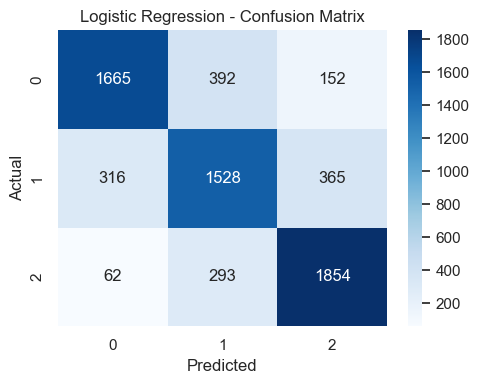


🔍 Evaluating Model: Random Forest


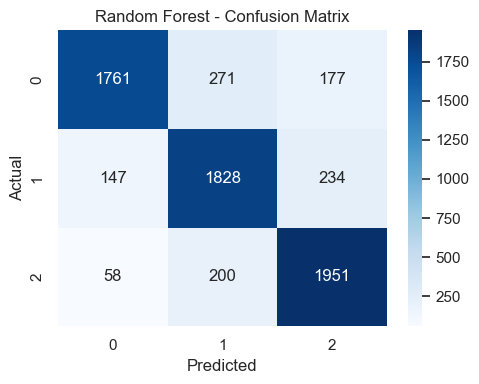


🔍 Evaluating Model: SVM


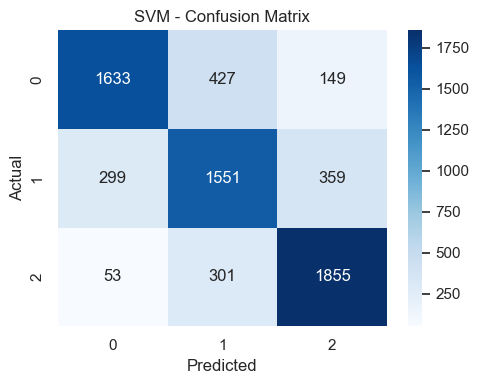


🔍 Evaluating Model: KNN


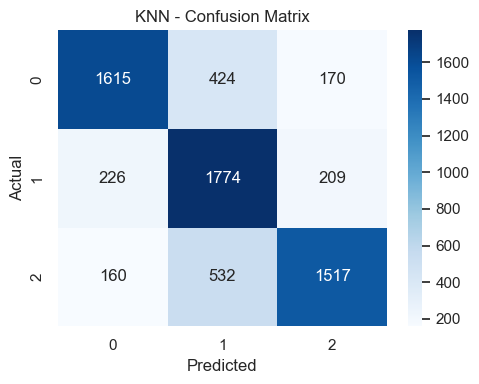


🔍 Evaluating Model: Gradient Boosting


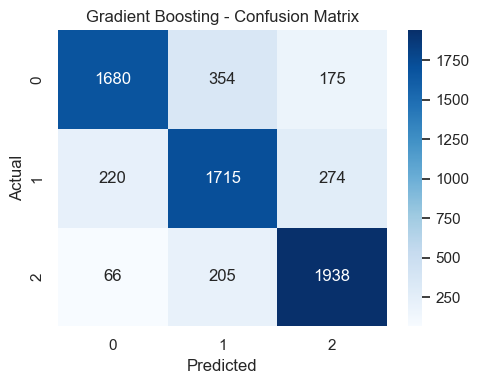


🔍 Evaluating Model: Naive Bayes


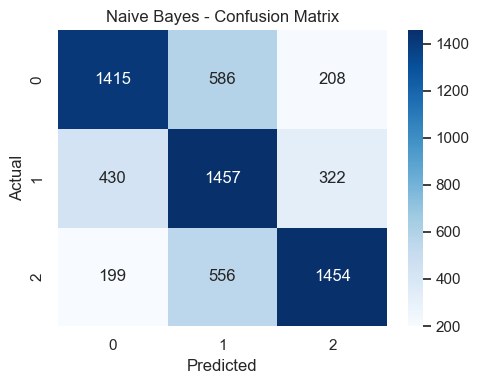


📊 Sorted Model Results (Best to Worst based on Dropout Recall):
                 Model  Accuracy  Dropout Recall
1        Random Forest  0.835974        0.835974
4    Gradient Boosting  0.804738        0.804738
0  Logistic Regression  0.761581        0.761581
2                  SVM  0.760374        0.760374
3                  KNN  0.740305        0.740305
5          Naive Bayes  0.652784        0.652784

🏆 Best Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      2209
           1       0.80      0.83      0.81      2209
           2       0.83      0.88      0.85      2209

    accuracy                           0.84      6627
   macro avg       0.84      0.84      0.84      6627
weighted avg       0.84      0.84      0.84      6627



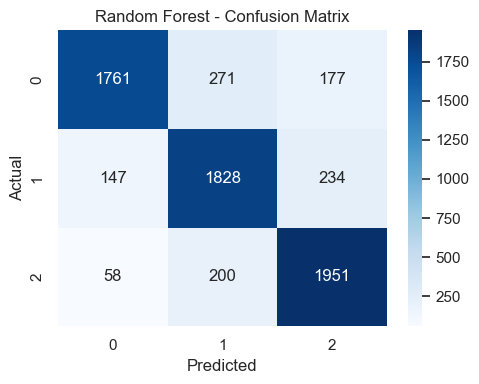

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Set up Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store model results
results = []

# Evaluate each model
for name, model in models.items():
    print(f"\n🔍 Evaluating Model: {name}")
    
    # Cross-validated predictions
    y_pred = cross_val_predict(model, X_scaled, y, cv=cv)
    
    # Compute metrics
    acc = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='macro')  # Assuming class '0' = Dropout
    report = classification_report(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    
    # Store in results list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Dropout Recall": recall,
        "Confusion Matrix": cm,
        "Report": report
    })
    
    # Show confusion matrix for each model
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Convert to DataFrame and sort by dropout recall
df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by="Dropout Recall", ascending=False)

# Show ranked models
print("\n📊 Sorted Model Results (Best to Worst based on Dropout Recall):")
print(df_sorted[["Model", "Accuracy", "Dropout Recall"]])

# Show report and confusion matrix of best model
best_model = df_sorted.iloc[0]
print(f"\n🏆 Best Model: {best_model['Model']}")
print("Classification Report:")
print(best_model['Report'])

plt.figure(figsize=(5, 4))
sns.heatmap(best_model["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model['Model']} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [49]:
# Refitting the model on the full dataset
final_model = models[best_model['Model']]
final_model.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [50]:
from sklearn.pipeline import Pipeline
import pickle

# Creating a pipeline 
pipeline = Pipeline([('classifier', final_model)])

# Fitting pipeline on entire dataset
pipeline.fit(X, y)

# Saving pipeline
with open('student_dropout_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)